## **Advanced NLP Auto-correction & Prediction System**

**Summary:**
In this project, I developed an advanced auto-correction and prediction system using NLP techniques. The system accurately corrects misspelled words and predicts next-word suggestions based on user input.

**Key Features:**
1. **Data Preprocessing:** Tokenization, lowercase conversion, and stopword removal.
  
2. **Frequency Analysis:** Understanding word distribution in the corpus.
  
3. **Probability Calculation:** Assessing word likelihood in the corpus.
  
4. **Auto-correction:** Implementing Levenshtein similarity for accurate corrections.
  
5. **Prediction:** Providing precise next-word suggestions based on probabilities.
  
6. **Enhanced Suggestions:** Offering multiple correction options based on similarity scores.

**Findings:**
- Effective misspelling correction and precise next-word predictions enhance user experience and productivity.
- Enhanced suggestions improve user satisfaction by providing multiple correction options.

**Deployment and github repo**
## GitHub Repo: 

## Web App Link: 

## Extracting and Preparing Text Data

In [2]:
from pathlib import Path
import re
from collections import Counter

file_path = Path("C:/Users/gunav/Downloads/SSJ3-NLP-Projects/context-aware-autocorrect/autocorrect.ipynb")

with open(file_path, "r", encoding="utf-8") as file:
    file_content = file.read()

words = re.findall(r'\w+', file_content.lower())

V = set(words)

V_list = list(V)

ten_words = words[:10]

print("Vocabulary:", V_list[:10])
print("First ten words:", ten_words)

Vocabulary: ['documents', 'unpack', 'based', 'where', 'extracting', 'relevant', 'system', 'repo', 'descending', 'change']
First ten words: ['cells', 'cell_type', 'markdown', 'id', '98b453bd', 'metadata', 'source', 'advanced', 'nlp', 'auto']


## Analyzing Word Frequencies

I imported the necessary libraries, including NLTK for natural language processing tasks, and the Counter class from the collections module for counting word frequencies.

Then, I downloaded the list of stopwords from NLTK's corpus if it wasn't already downloaded, and I created a set of English stopwords using `stopwords.words('english')`.

Next, I filtered out non-alphabetic words and stopwords from the list of words using a list comprehension. This ensures that only meaningful words are considered for frequency counting.

After filtering, I used the Counter class to count the frequency of each filtered word, creating a dictionary where keys are words and values are their corresponding frequencies.

Finally, I retrieved the ten most common filtered words and their frequencies using the `most_common()` method of the Counter object, storing the result in the variable `most_common_txt`.

In [3]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the list of stopwords if not already downloaded
nltk.download('stopwords')

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Filter out non-alphabetic words and stop words
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the frequency of each filtered word
word_freq = Counter(filtered_words)

# Retrieve the ten most common filtered words and their frequencies
most_common_txt = word_freq.most_common(10)

print("Ten most common filtered words and their frequencies:", most_common_txt)

Ten most common filtered words and their frequencies: [('n', 186), ('word', 49), ('similarity', 36), ('words', 27), ('metadata', 21), ('id', 20), ('source', 20), ('suggestions', 18), ('text', 14), ('markdown', 13)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


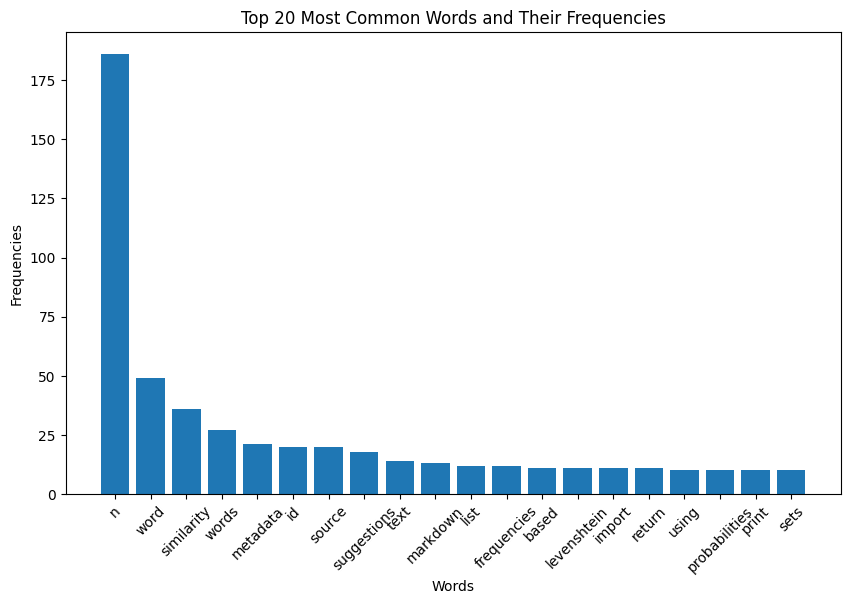

In [4]:
import matplotlib.pyplot as plt

most_common_20 = word_freq.most_common(20)

# Unpack 'most_common_20' into separate lists 'words' and 'frequencies' using the zip() function
words, frequencies = zip(*most_common_20)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Common Words and Their Frequencies')
plt.xticks(rotation=45)
plt.show()

## Computing Word Probabilities

Calculating word probabilities enables:

1. **Auto-suggestion Accuracy**: By understanding which words are more likely to occur based on their frequencies, the auto-suggestion system can offer more accurate and contextually relevant word suggestions as users type.

2. **Prediction Precision**: Knowing the probabilities of words allows the system to predict the next word in a sequence more precisely, enhancing the overall predictive capabilities of the system.

3. **User Experience Enhancement**: Accurate word probabilities lead to improved user experiences by providing more relevant suggestions and predictions, ultimately speeding up typing and reducing errors.

4. **System Efficiency**: By prioritizing words with higher probabilities, the system can optimize its resources and computational efforts, resulting in faster response times and lower computational costs.

In [5]:
probs = {}

total = sum(word_freq.values())

# Calculate the probability of each word
for word, freq in word_freq.items():
    probs[word] = freq / total

print("Word Probabilities:")
for word, prob in list(probs.items())[:10]:
    print(word, ":", prob)

Word Probabilities:
cells : 0.000774593338497289
markdown : 0.010069713400464756
id : 0.015491866769945779
metadata : 0.016266460108443067
source : 0.015491866769945779
advanced : 0.001549186676994578
nlp : 0.003098373353989156
auto : 0.004647560030983733
correction : 0.006971340046475601
prediction : 0.003098373353989156


## Implementing Auto-correction Algorithm

I start by defining a function called `my_autocorrect`, which takes an `input_word` as its parameter. 
Next, I import two important libraries: `textdistance` for calculating word similarity and `pandas` for organizing data in a tabular format.
I convert the `input_word` to lowercase using `.lower()` method to ensure that my comparisons are case-insensitive.
Then, I check if the `input_word` exists in my vocabulary (`V`). If it does, I return a message indicating that the word seems to be correct.
If the `input_word` is not found in the vocabulary, I proceed to calculate similarity scores using the Jaccard distance between the `input_word` and each word in my vocabulary. 
Creating a DataFrame (`df`) comes next. I organize the probabilities (`probs`) and similarity scores in this DataFrame, which helps in further analysis.
Sorting the DataFrame is a crucial step. I sort it by two criteria: 'Similarity' and 'Prob'. This ensures that the most similar words with the highest probabilities appear first in my suggestions.
Finally, I return the top suggestions based on similarity and probability using the `head()` method. This provides me with the first few rows of the DataFrame.
In an example usage, I call the `my_autocorrect` function with the input word 'neverteless' and store the result in the variable `suggestion_words`.
To conclude, I print the top suggestions based on similarity and probability. These suggestions can assist in correcting the misspelled input word.

In [ ]:
%pip install textdistance

Jaccard similarity is another metric used to measure the similarity between two sets. It is particularly useful when dealing with sets of elements, such as words in a document, tokens in a text, or items in a dataset.

The Jaccard similarity between two sets \(A\) and \(B\) is defined as the size of their intersection divided by the size of their union. Mathematically, it can be expressed as:

\[ \text{Jaccard Similarity}(A, B) = \frac{|A \cap B|}{|A \cup B|} \]

Where:
- \( |A \cap B| \) represents the size of the intersection of sets \(A\) and \(B\) (i.e., the number of elements common to both sets).
- \( |A \cup B| \) represents the size of the union of sets \(A\) and \(B\) (i.e., the total number of unique elements in both sets).

The Jaccard similarity ranges from 0 to 1, where 0 indicates no similarity (i.e., the sets have no elements in common) and 1 indicates perfect similarity (i.e., the sets are identical).

In the context of text processing and natural language processing, Jaccard similarity is often used for tasks such as measuring document similarity, identifying duplicate records in datasets, and clustering similar documents or texts based on their content. It provides a simple and intuitive way to compare the similarity between sets of elements.

In [ ]:
import textdistance
import pandas as pd

def my_autocorrect(input_word):
    input_word = input_word.lower()  # Convert the input word to lowercase
    
    # Check if the input word is in the vocabulary
    if input_word in V:
        return 'Your word seems to be correct'
    
    # Calculate similarity scores using Jaccard distance
    similarity_scores = {word: textdistance.jaccard(input_word, word) for word in word_freq.keys()}
    
    # Create a DataFrame from the probabilities and similarity scores
    df = pd.DataFrame({'Word': list(probs.keys()), 'Prob': list(probs.values()), 'Similarity': list(similarity_scores.values())})
    
    # Sort the DataFrame by 'Similarity' and 'Prob' in descending order
    df = df.sort_values(by=['Similarity', 'Prob'], ascending=[False, False])
    
    return df.head()

# Call the 'my_autocorrect' function with an example input
suggestion_words = my_autocorrect('nevertless')

print("Top suggestions based on similarity and probability:")
print(suggestion_words)

Top suggestions based on similarity and probability:
            Word      Prob  Similarity
288  neverteless  0.001549    0.909091
317   represents  0.003098    0.666667
302     elements  0.003873    0.636364
200     relevant  0.001549    0.636364
47   levenshtein  0.008521    0.615385


## Implementing Enhanced Correction Suggestions

I'm defining a function `correction_suggestion` that takes a word as input.
First, I convert the word to lowercase.
Then, I check if the word is in the vocabulary (`V`). If it is, I return it.
If not, I find suggestions based on Levenshtein normalized similarity using list comprehension.
I return the first suggestion from the list if it exists, otherwise `None`.
In my example usage, I call this function with the misspelled word 'kidness' and print the result.

Levenshtein normalized similarity is a metric used to measure the similarity between two strings. It's based on the Levenshtein distance, also known as the edit distance, which calculates the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into another.

The Levenshtein normalized similarity is a normalized version of the Levenshtein distance, which means it provides a similarity score between 0 and 1, where 0 indicates no similarity and 1 indicates perfect similarity. 

The formula for calculating Levenshtein normalized similarity is:

\[ \text{Similarity} = 1 - \frac{\text{LevenshteinDistance}(s1, s2)}{\max(\text{len}(s1), \text{len}(s2))} \]

Here, \( \text{LevenshteinDistance}(s1, s2) \) represents the Levenshtein distance between strings \( s1 \) and \( s2 \), and \( \max(\text{len}(s1), \text{len}(s2)) \) represents the maximum length of the two strings.

In the context of text processing and natural language processing, Levenshtein normalized similarity is often used in tasks such as spelling correction, fuzzy string matching, and text similarity measurement. It provides a quantitative measure of how similar two strings are, taking into account the lengths of the strings and the number of edits required to transform one string into the other.

In [10]:
import textdistance

def correction_suggestion(word):
    word = word.lower()
    
    # Check if the word is in the vocabulary
    if word in V:
        return word
    
    # If the word is not in the vocabulary, find suggestions based on Levenshtein normalized similarity
    suggestions = [w for w in V if textdistance.levenshtein.normalized_similarity(word, w) > 0.7]
    
    # Return the first suggestion from the list if suggestions exist, otherwise return None
    if suggestions:
        return suggestions[0]
    else:
        return None

result = correction_suggestion('markdon')

print("Corrected word suggestion:", result)

Corrected word suggestion: markdown
